# ON THE SUM OF THE SQUARE ROOTS OF THE FIRST $n$ NATURAL NUMBERS
## RAMANUJAN (1915)
### Author of this notebook: Keny Geovany (2025.01.11)

(ENGLISH)

In Ramanujan paper titled "ON THE SUM OF THE SQUARE ROOTS OF THE FIRST $n$ NATURAL NUMBERS" and published in the Journal of the Indian Mathematical Society (1915), the author proposed a recursive method to compute asymptotic formulas for the function:

$\sigma_l(n) := \sum_{k=1}^{n} k^{\frac{2l+1}{2}}, \hspace{3mm} l = -1,0,1,2,3,\ldots$

Definitions:

1. $s_l(n) := \sum_{k=0}^{\infty} \frac{(\sqrt{n+k+1}+\sqrt{n+k})^{-(2l+1)}}{\sqrt{n+k+1}\sqrt{n+k}}$

3. $\Delta f(n) := f(n+1)-f(n)$

3. $\alpha_i$, $\beta_i$, $\delta_i$ are defined by

$-\Delta s_{l}(n) = \sqrt{n+1}\sum_{i=0}^{l} B_{i+1}^{l}n^{i} - \sqrt{n}\sum_{i+1}^{l}\alpha_{i+1}^{l}n^{i}$

$\delta^{l} = T_{ll}^{-1}(-T_{l,l+1}\alpha+\beta[:-1])$

4. $P_{l}(n) = \sum_{k=0}^{l}\alpha_{k+1}n^{k}$

It is easy to see that the method of Ramanujan to compute $\sigma_{i}(n)$ reduces to the following recursive formula:

$\sigma_{l}(n) = -\frac{1}{\delta_{l}^{l}}P_{l}(n) - \sum_{i=0}^{l-2}\frac{\delta_{i+1}^{l}}{\delta_{l}^{l}} \sigma_{i}(n) + \frac{1}{\delta_{l}^{l}}[S_{l}(n)-S_{l}(0)]$

with initial conditions: $\alpha_{0}^{1}=3$, $\alpha_{1}^{1}=4$, $\delta_{1}^{1}=-6$

(ESPAÑOL)

En el artículo de Ramanujan "SOBRE LA SUMA DE LAS RAÍCES CUADRADAS DE LOS PRIMEROS $n$ NUMEROS NATURALES", publicado en el Journal of the Indian Mathematical Society (1915), el autor propone un método recursivo para calcular fórmulas asintóticas para la función:

$\sigma_l(n) := \sum_{k=1}^{n} k^{\frac{2l+1}{2}}, \hspace{3mm} l = -1,0,1,2,3,\ldots$

Definiciones:

1. $s_l(n) := \sum_{k=0}^{\infty} \frac{(\sqrt{n+k+1}+\sqrt{n+k})^{-(2l+1)}}{\sqrt{n+k+1}\sqrt{n+k}}$

3. $\Delta f(n) := f(n+1)-f(n)$

3. $\alpha_i$, $\beta_i$, $\delta_i$ are defined by

$-\Delta s_{l}(n) = \sqrt{n+1}\sum_{i=0}^{l} B_{i+1}^{l}n^{i} - \sqrt{n}\sum_{i+1}^{l}\alpha_{i+1}^{l}n^{i}$

$\delta^{l} = T_{ll}^{-1}(-T_{l,l+1}\alpha+\beta[:-1])$

4. $P_{l}(n) = \sum_{k=0}^{l}\alpha_{k+1}n^{k}$

Es fácil ver que el método de Ramanujan para calcular $\sigma_{i}(n)$ se simplifica a la siguiente fórmula recursiva:

$\sigma_{l}(n) = -\frac{1}{\delta_{l}^{l}}P_{l}(n) - \sum_{i=0}^{l-2}\frac{\delta_{i+1}^{l}}{\delta_{l}^{l}} \sigma_{i}(n) + \frac{1}{\delta_{l}^{l}}[S_{l}(n)-S_{l}(0)]$

con las condiciones iniciales: $\alpha_{0}^{1}=3$, $\alpha_{1}^{1}=4$, $\delta_{1}^{1}=-6$

Ejemplo para $l=7$

$\sigma_{k=0}^{n} k^{5/2} = \frac{5}{24}n^{1/2} + \frac{1}{2}n^{3/2} + \frac{2}{7}n^{7/2} + \frac{1}{224}[S_{3}(n)-S_{3}(0)] - \frac{1}{96}[S_{2}(n)-S_{2}(0)]$

In [13]:
R.<n> = PolynomialRing(QQ)

# Get B, alpha, and delta. N = 2l+1.
def get_coef(N):
    l = (N-1)/2
    
    # Compute B and alpha
    a = R(0*n)
    b = R(0*n)
    for i in range(l+1):
        a = a + binomial(N,2*i+1)*(n+1)^(i)*n^(l-i) # B
        b = b + binomial(N,2*i+1)*(n+1)^(l-i)*n^(i) # alpha
    a = a.list()
    b = b.list()
    
    # Build T_{ll}
    T1 = matrix(QQ,l,l)
    for i in range(l):
        for j in range(i+1):
            T1[j,i] = binomial(i,j)
            
    # Build T_{l,l+1}
    T2 = matrix(QQ,l+1,l+1)
    for i in range(l+1):
        for j in range(i+1):
            T2[j,i] = binomial(i,j)
    T2 = T2[:-1,:]
    
    # Compute delta
    a = matrix(a[:-1]).T
    b = matrix(b).T
    delta = T1^(-1)*(-T2*b + a)
    
    return vector(a.transpose()), vector(b.transpose()), vector(delta.transpose())

print(f"(a,b,delta) = {get_coef(7)}")

(a,b,delta) = ((1, 24, 80), (7, 56, 112, 64), (-14, 0, -224))


In [14]:
from sympy import symbols
var('n')

def build_S(n):
    return symbols(f'S:{n+1}')
S = build_S(20) # Bigger than N

def build_formula(N):
    l = int((N-1)/2)
    
    # Base case N=3
    if N==3:
        res = (1/2)*n^(1/2) + (2/3)*n^(3/2) + (1/6)*S[1]
        return res
    
    # If N>3
    else:
        # COMPUTE B := a, alpha := b, delta := delta
        a, b, delta = get_coef(N)
        
        # COMPUTE the polunomial P
        P = 0
        for i in range(l+1):
            P = P + b[i]*n^(i)*sqrt(n)
        
        res = -(1/delta[-1])*(P + S[l])
        
        # Add the recursive terms
        for i in range(l-1):
            res = res - (delta[i]/delta[-1])*build_formula(2*i+3)
            
        return res
    
build_formula(7)

2/7*n^(7/2) + 1/2*n^(5/2) + 5/24*n^(3/2) - 1/96*S1 + 1/224*S3

## GRAPHS

## $\sum_{k=0}^{n} n^{1/2}$

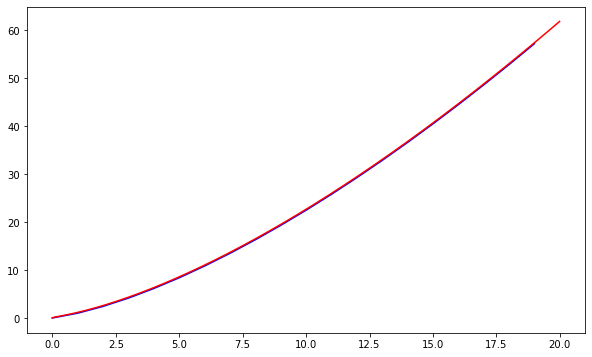

In [15]:
def f(n):
    return 2/3*n^(3/2) + 1/2*sqrt(n)

def g(n):
    suma = 0
    for i in range(n+1):
        suma = suma + sqrt(i)
    return suma

import numpy as np
from matplotlib import pyplot as plt
L = 20
plt.figure(figsize=(10, 6))
X = np.arange(0,L,0.01)
Xd = range(L)
plt.plot(Xd, [g(x) for x in Xd], marker='', color='blue')
plt.plot(X, [f(x) for x in X], marker='', color='red')

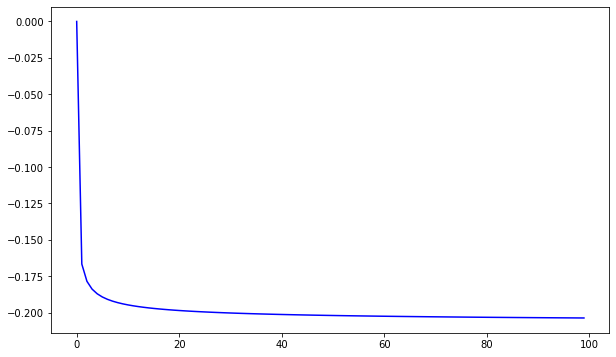

In [16]:
L = 100
plt.figure(figsize=(10, 6))
X = np.arange(0,L,0.01)
Xd = range(L)
plt.plot(Xd, [g(x)-f(x) for x in Xd], marker='', color='blue')

## $\sum_{k=0}^{n} n^{3/2}$

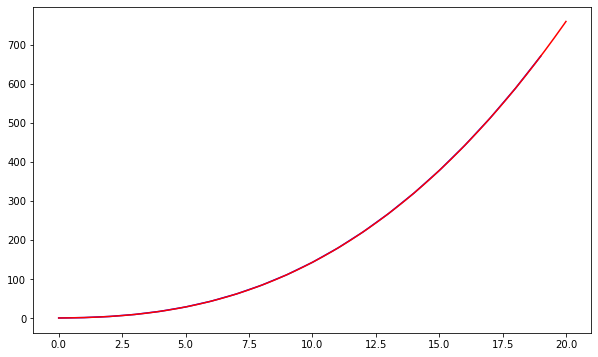

In [17]:
def f(n):
    return 2/5*n^(5/2) + 1/2*n^(3/2) + 1/8*sqrt(n)

def g(n):
    suma = 0
    for i in range(n+1):
        suma = suma +i^(3/2)
    return suma

import numpy as np
from matplotlib import pyplot as plt
L = 20
plt.figure(figsize=(10, 6))
X = np.arange(0,L,0.01)
Xd = range(L)
plt.plot(Xd, [g(x) for x in Xd], marker='', color='blue')
plt.plot(X, [f(x) for x in X], marker='', color='red')

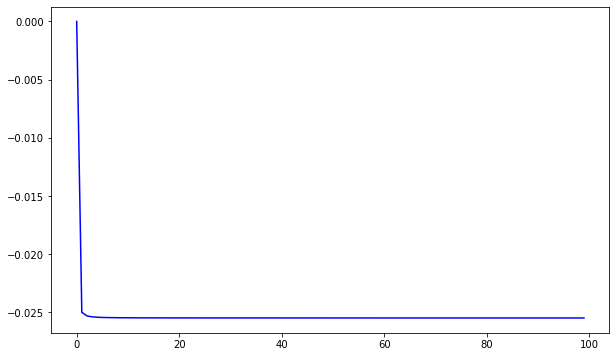

In [18]:
L = 100
plt.figure(figsize=(10, 6))
X = np.arange(0,L,0.01)
Xd = range(L)
plt.plot(Xd, [g(x)-f(x) for x in Xd], marker='', color='blue')

## $\sum_{k=0}^{n} n^{5/2}$

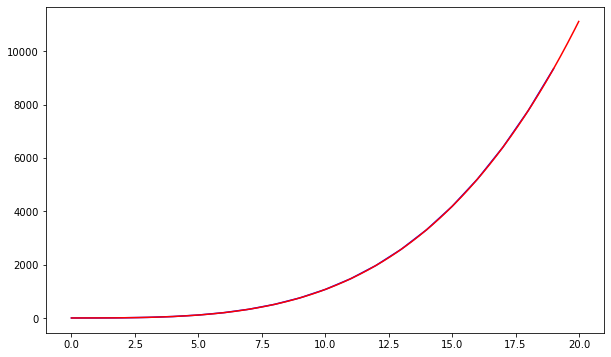

In [19]:
def f(n):
    return 2/7*n^(7/2) + 1/2*n^(5/2) + 5/24*n^(3/2)

def g(n):
    suma = 0
    for i in range(n+1):
        suma = suma +i^(5/2)
    return suma

import numpy as np
from matplotlib import pyplot as plt
L = 20
plt.figure(figsize=(10, 6))
X = np.arange(0,L,0.01)
Xd = range(L)
plt.plot(Xd, [g(x) for x in Xd], marker='', color='blue')
plt.plot(X, [f(x) for x in X], marker='', color='red')

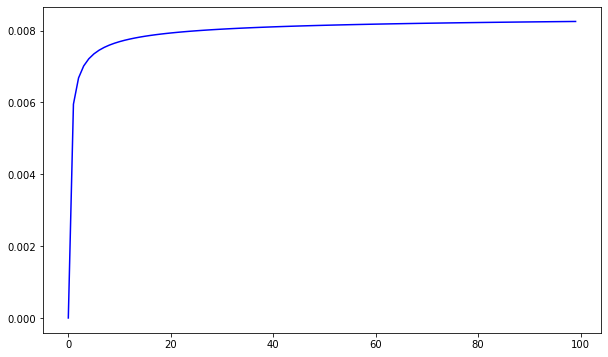

In [20]:
L = 100
plt.figure(figsize=(10, 6))
X = np.arange(0,L,0.01)
Xd = range(L)
plt.plot(Xd, [g(x)-f(x) for x in Xd], marker='', color='blue')

## $\sum_{k=0}^{n} n^{7/2}$

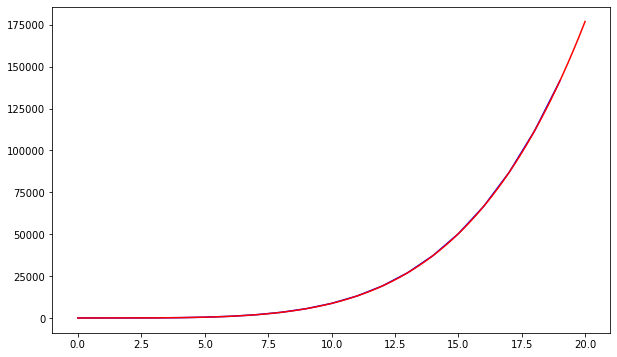

In [21]:
def f(n):
    return 2/9*n^(9/2) + 1/2*n^(7/2) + 7/24*n^(5/2) - 7/384*sqrt(n)

def g(n):
    suma = 0
    for i in range(n+1):
        suma = suma +i^(7/2)
    return suma

import numpy as np
from matplotlib import pyplot as plt
L = 20
plt.figure(figsize=(10, 6))
X = np.arange(0,L,0.01)
Xd = range(L)
plt.plot(Xd, [g(x) for x in Xd], marker='', color='blue')
plt.plot(X, [f(x) for x in X], marker='', color='red')

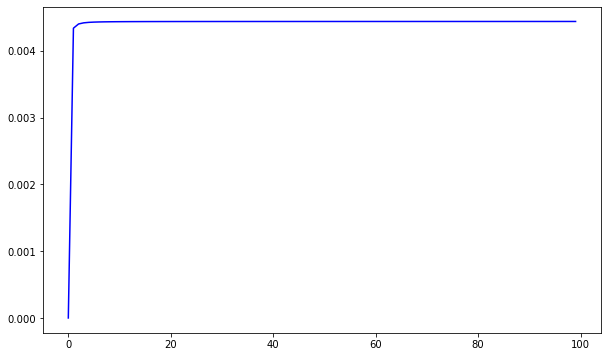

In [22]:
L = 100
plt.figure(figsize=(10, 6))
X = np.arange(0,L,0.01)
Xd = range(L)
plt.plot(Xd, [g(x)-f(x) for x in Xd], marker='', color='blue')

## $\sum_{k=0}^{n} n^{9/2}$

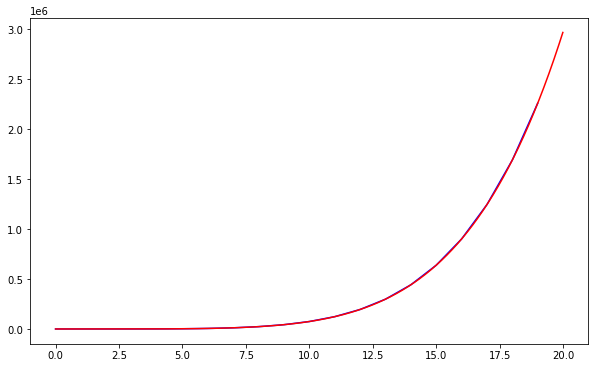

In [23]:
def f(n):
    return 2/11*n^(11/2) + 1/2*n^(9/2) + 3/8*n^(7/2) - 7/128*n^(3/2)

def g(n):
    suma = 0
    for i in range(n+1):
        suma = suma +i^(9/2)
    return suma

import numpy as np
from matplotlib import pyplot as plt
L = 20
plt.figure(figsize=(10, 6))
X = np.arange(0,L,0.01)
Xd = range(L)
plt.plot(Xd, [g(x) for x in Xd], marker='', color='blue')
plt.plot(X, [f(x) for x in X], marker='', color='red')

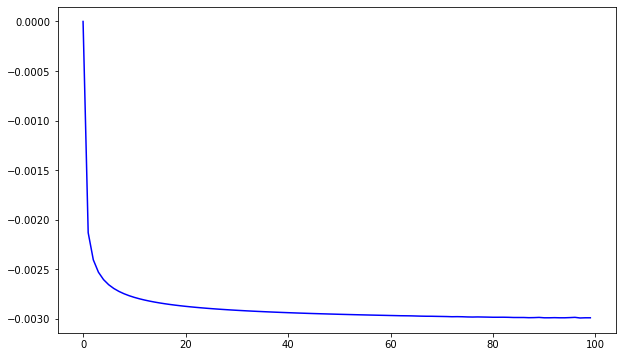

In [24]:
L = 100
plt.figure(figsize=(10, 6))
X = np.arange(0,L,0.01)
Xd = range(L)
plt.plot(Xd, [g(x)-f(x) for x in Xd], marker='', color='blue')

Thanks!